# Introduction
***
The Mall customers dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score. It collects insights from the data and group customers based on their behaviors.

Dataset: https://www.kaggle.com/shwetabh123/mall-customers

## Problem
***
Segment the customers based on the age, gender, interest. Customer segmentation is an important practise of dividing customers base into individual groups that are similar. It is useful in customised marketing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
filepath="Mall_Customers.csv"
df=pd.read_csv(filepath)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={"Genre":"Gender"}, inplace = True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Customer gender visualization
***

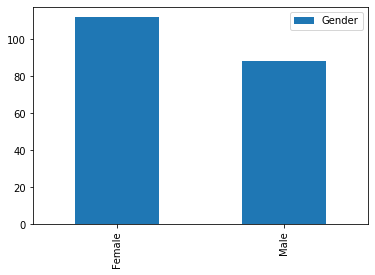

In [5]:
df_gen = df["Gender"]
df_gen.value_counts().plot(kind="bar", legend =1)

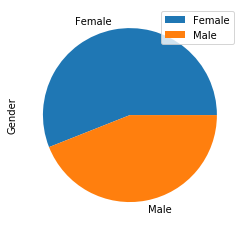

In [6]:
df_gen.value_counts().plot(kind="pie",legend =1)

### With these charts, we can conclude that majority of the mall customers are female.

## Age Distribution
***

In [7]:
df_age = df["Age"]
df_age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

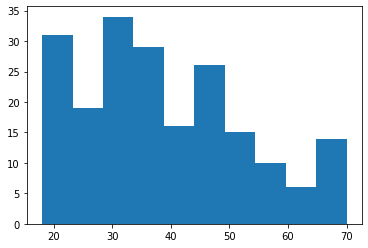

In [8]:
df_age.hist(grid = 0)

### From the histrogram, we can conclude that people of age between 18 and 35 are frequently visiting the mall.

# Annual Income Analysis

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.rename(columns={"Annual Income (k$)":"Salary"}, inplace=1)
df.rename(columns={"Spending Score (1-100)":"Score"}, inplace=1)
df.head()

,CustomerID,Gender,Age,Salary,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df["Salary"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Salary, dtype: float64

Text(0, 0.5, 'Frequency')

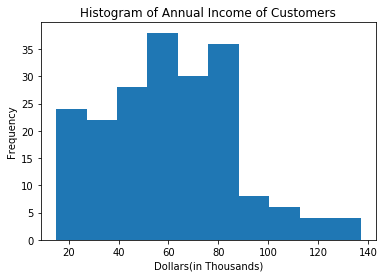

In [12]:
h0=df["Salary"].hist(grid=0)
h0.set_title("Histogram of Annual Income of Customers")
h0.set_xlabel("Dollars(in Thousands)")
h0.set_ylabel("Frequency")

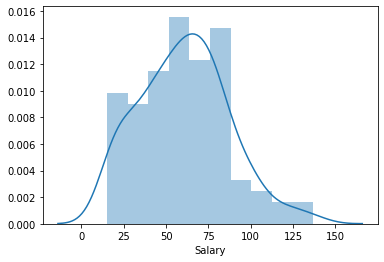

In [13]:
sns.distplot(df['Salary'])

### With the above graphs, we can see that most of the people have annual income between 50,000 and 75,000 Dollars.

# Analyzing Spending score 
***

In [14]:
df.head()

,CustomerID,Gender,Age,Salary,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Distribution of Spending Scores')

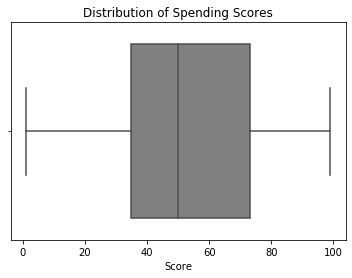

In [15]:
sps=sns.boxplot(df["Score"], color="grey")
sps.set_title("Distribution of Spending Scores")

Text(0.5, 0, 'Spending Scores')

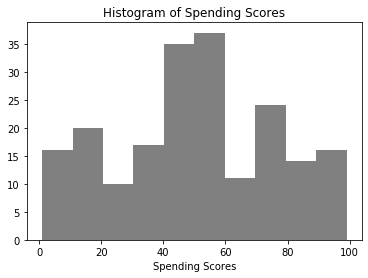

In [16]:
h1=df['Score'].hist(grid = 0, color= "grey")
h1.set_title("Histogram of Spending Scores")
h1.set_xlabel("Spending Scores")

### We can see that most of the people have scores between 35 to 75.

# K-Means Clustering

In [17]:
df.head()
#df.drop(index="CustomerID")

,CustomerID,Gender,Age,Salary,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


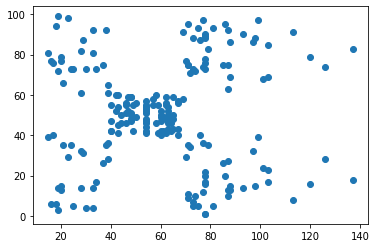

In [18]:
plt.scatter(df["Salary"],df["Score"])

### Finding the number of clusters with the "elbow " method

In [19]:
k_range=[1,2,3,4,5,6,7,8,9,10]
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Salary","Score"]])
    sse.append(km.inertia_)

In [20]:
sse

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75479.76429338777,
 58300.44332159069,
 51084.50595493436,
 44307.87341670445,
 40798.68774656602,
 37717.51360922359]

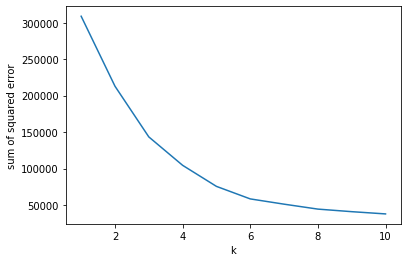

In [21]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)

### The elbow point can be found at k=4. In other words, there are 4 or 5 clusters in this dataset.

In [22]:
km= KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
y_pred=km.fit_predict(df[["Salary","Score"]])
y_pred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
df['cluster']=y_pred
df.tail()

,CustomerID,Gender,Age,Salary,Score,cluster
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
199,200,Male,30,137,83,2


No handles with labels found to put in legend.


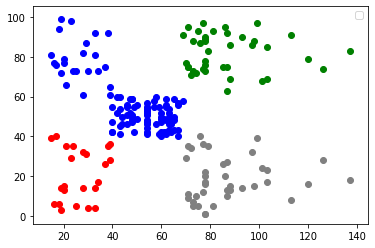

In [25]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]

plt.scatter( df0.Salary, df0.Score,color="grey")
plt.scatter( df1.Salary, df1.Score,color="red")
plt.scatter( df2.Salary, df2.Score,color="green")
plt.scatter( df3.Salary, df3.Score,color="blue")

plt.legend()

### There seems to be 5 clusters...

In [32]:
km1=KMeans(n_clusters=5)
y_pred1=km.fit_predict(df[["Salary","Score"]])
y_pred1

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

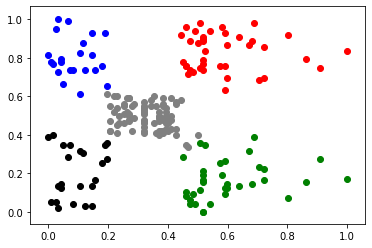

In [43]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]

plt.scatter( df0.Salary, df0.Score,color="grey")
plt.scatter( df1.Salary, df1.Score,color="red")
plt.scatter( df2.Salary, df2.Score,color="green")
plt.scatter( df3.Salary, df3.Score,color="blue")
plt.scatter( df4.Salary, df4.Score,color="black")

## It worked! Now, lets scale the graph for more accuracy

In [50]:
scaler= MinMaxScaler()
scaler.fit(df[['Salary']])
df["Salary"]= scaler.transform(df[["Salary"]])
df

,CustomerID,Gender,Age,Salary,Score,cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,1
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,0
196,197,Female,45,0.909836,0.275510,4
197,198,Male,32,0.909836,0.744898,0
198,199,Male,32,1.000000,0.173469,4


In [51]:
scaler= MinMaxScaler()
scaler.fit(df[['Score']])
df["Score"]= scaler.transform(df[["Score"]])
df

,CustomerID,Gender,Age,Salary,Score,cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,1
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,0
196,197,Female,45,0.909836,0.275510,4
197,198,Male,32,0.909836,0.744898,0
198,199,Male,32,1.000000,0.173469,4


In [52]:
km = KMeans(n_clusters=5)
y_pred=km.fit_predict(df[["Salary", "Score"]])
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [53]:
df.head()

,CustomerID,Gender,Age,Salary,Score,cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,1


In [54]:
df['cluster']=y_pred
df.head()

,CustomerID,Gender,Age,Salary,Score,cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,4


No handles with labels found to put in legend.


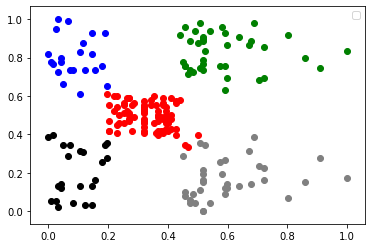

In [55]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]

plt.scatter( df0.Salary, df0.Score,color="grey")
plt.scatter( df1.Salary, df1.Score,color="red")
plt.scatter( df2.Salary, df2.Score,color="green")
plt.scatter( df3.Salary, df3.Score,color="blue")
plt.scatter( df4.Salary, df4.Score,color="black")
plt.legend()

### With this scatter plot, we can deduce that customers can be segmented into 5 groups with varying characteristics. The businesses in the mall can be better serve their customer base by further studying their interests, which invlove what they buy, when they buy. how much they buy